11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


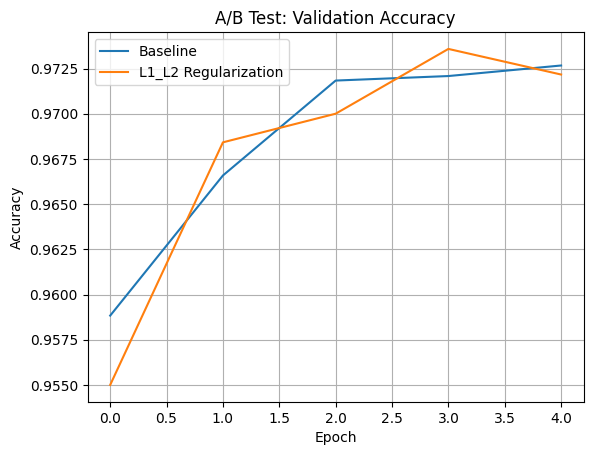

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define a function to build model
def build_model(use_regularization=False):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train baseline model
baseline_model = build_model(use_regularization=False)
history_baseline = baseline_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Train regularized model
reg_model = build_model(use_regularization=True)
history_reg = reg_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Plot validation accuracy comparison
plt.plot(history_baseline.history['val_accuracy'], label='Baseline')
plt.plot(history_reg.history['val_accuracy'], label='L1_L2 Regularization')
plt.title("A/B Test: Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()